In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import re
%matplotlib inline

import matplotlib.pyplot as plt
import glob
import imageio
from os import walk
from PIL import Image

types = [
    'Normal'  ,'Fire'     ,
    'Fighting', 'Water'   ,
    'Flying'  , 'Grass'   ,
    'Poison'  , 'Electric',
    'Ground'  , 'Psychic' ,
    'Rock'    , 'Ice'     ,
    'Bug'     , 'Dragon'  ,
    'Ghost'   , 'Dark'    ,
    'Steel'   , 'Fairy'   ]

colors = [
    '#A8A878', '#F08030',
    '#C03028', '#6890F0',
    '#A890F0', '#78C850',
    '#A040A0', '#F8D030',
    '#E0C068', '#F85888',
    '#B8A038', '#98D8D8',
    '#A8B820', '#7038F8',
    '#705898', '#705848',
    '#B8B8D0', '#EE99AC']

def shuffle_in_unison(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

def get_type(t):
    if t in types:
        #print(t)
        return types.index(t)
    if t=='':
        return 18
    #print(types[t])
    return types[t]

def two_hot(t):
    results = []
    type1 = None
    type1_amt = 0
    type2 = None #FINISH THISSSSSSS
    type2_amt = 0
    for i in range(18):
        if t[i] > .05:
            if t[i] > type1_amt:
                type2 = type1
                type2_amt = type1_amt
                type1 = types[i]
                type1_amt = t[i]
            elif t[i] > type2_amt:
                type2 = types[i]
                type2_amt = t[i]
    if not type1 is None:
        results.append(type1)
        if not type2 is None:
            results.append(type2)
    return results

def two_hot_numbers(t):
    results = []
    type1 = None
    type1_amt = 0
    type2 = None #FINISH THISSSSSSS
    type2_amt = 0
    for i in range(18):
        if t[i] > .05:
            if t[i] > type1_amt:
                type2 = type1
                type2_amt = type1_amt
                type1 = i
                type1_amt = t[i]
            elif t[i] > type2_amt:
                type2 = i
                type2_amt = t[i]
    if not type1 is None:
        results.append(type1)
        if not type2 is None:
            results.append(type2)
    return results

def get_type_vector(t):
    if t=='':
        return [0] * 18


#print(get_type(10))

def get_types(v):
    for i in range(len(v)):
        v[i][0] = get_type(v[i][0])
        v[i][1] = get_type(v[i][1])
    return v
    
def format_types(v):
    v = get_types(v)
    result = keras.utils.to_categorical(v, 19)
    result = np.delete(result, np.s_[18:], axis = 2)
    #print(result)
    result2 = []
    for i in range(len(result)):
        result2.append(np.add(result[i][0], result[i][1]))
    #print(result2)
    return result2
    

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)


  plt.xlabel("{}".format(two_hot(true_label)))
    
def plot_image_batched(i, predictions_array, true_label, img, b):
  predictions_array, true_label, img = predictions_array[i], true_label[i%b], img[i%b]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  #img = ((img - np.min(img)))
  img = img / 255.0 #np.max(img)
  plt.imshow((img).squeeze())
  plt.xlabel("{}{}".format(i, two_hot(true_label)))

    
def plot_value_array(i, predictions_array, true_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(types, predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_labels = two_hot(predictions_array)
  true_labels = two_hot(true_label)

  """for predicted_label in predicted_labels:
    thisplot[predicted_label].set_color('red')
  for true_label in true_labels:
    thisplot[true_label].set_color('blue')"""
  

  for i in range(18):
    thisplot[i].set_color(colors[i])

  '''
  thisplot[0].set_color('#A8A878')  #Normal
  thisplot[1].set_color('#F08030')  #Fire
  thisplot[2].set_color('#C03028')  #Fighting
  thisplot[3].set_color('#6890F0')  #Water
  thisplot[4].set_color('#A890F0')  #Flying
  thisplot[5].set_color('#78C850')  #Grass
  thisplot[6].set_color('#A040A0')  #Poison
  thisplot[7].set_color('#F8D030')  #Electric
  thisplot[8].set_color('#E0C068')  #Ground
  thisplot[9].set_color('#F85888')  #Psychic
  thisplot[10].set_color('#B8A038') #Rock
  thisplot[11].set_color('#98D8D8') #Ice
  thisplot[12].set_color('#A8B820') #Bug
  thisplot[13].set_color('#7038F8') #Dragon
  thisplot[14].set_color('#705898') #Ghost
  thisplot[15].set_color('#705848') #Dark
  thisplot[16].set_color('#B8B8D0') #Steel
  thisplot[17].set_color('#EE99AC') #Fairy
  '''

  #sorted(range(len(predictions_array)), key=lambda i: predictions_array[i])[-2:]
  predicted_label = predictions_array
  if bool(set(predicted_labels).intersection(true_labels)):
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel(predicted_labels, color=color)  

def read_wrap(d):
    im = imageio.imread(d)
    im = Image

def load_with_matching_labels(img_dir, label_source, reg_flag=False):
    
    f = []
    for (dirpath, dirnames, filenames) in walk(img_dir):
        f.extend(filenames)
        break
    img = [read_wrap('{}/{}'.format(img_dir, x)) for x in f]
    lab = []
    if not reg_flag:
        for name in f:
            #for the online split-tile datasets, we need to get the 4-6 charaters as a number
            num = int(name[4:7])
            to_add = (csv[num][2], csv[num][3])
            lab.append(to_add)
    else:
        for name in f:
            #Use the python regex module to find the number
            num = int(re.findall(r'\d+', name)[0])
            to_add = (csv[num][2], csv[num][3])
            lab.append(to_add)
    lab = np.asarray(lab)
    img = np.asarray(img)
    
    return img, lab

def max_pool_2d_nxn_regions(inputs, output_size: int, mode: str):
    """
    Performs a pooling operation that results in a fixed size:
    output_size x output_size.
    
    Used by spatial_pyramid_pool. Refer to appendix A in [1].
    
    Args:
        inputs: A 4D Tensor (B, H, W, C)
        output_size: The output size of the pooling operation.
        mode: The pooling mode {max, avg}
        
    Returns:
        A list of tensors, for each output bin.
        The list contains output_size * output_size elements, where
        each elment is a Tensor (N, C).
        
    References:
        [1] He, Kaiming et al (2015):
            Spatial Pyramid Pooling in Deep Convolutional Networks
            for Visual Recognition.
            https://arxiv.org/pdf/1406.4729.pdf.
            
    Ported from: https://github.com/luizgh/Lasagne/commit/c01e3d922a5712ca4c54617a15a794c23746ac8c
    """
    inputs_shape = tf.shape(inputs)
    h = tf.cast(tf.gather(inputs_shape, 1), tf.int32)
    w = tf.cast(tf.gather(inputs_shape, 2), tf.int32)
    
    if mode == 'max':
        pooling_op = tf.reduce_max
    elif mode == 'avg':
        pooling_op = tf.reduce_mean
    else:
        msg = "Mode must be either 'max' or 'avg'. Got '{0}'"
        raise ValueError(msg.format(mode))
        
    result = []
    n = output_size
    for row in range(output_size):
        for col in range(output_size):
            # start_h = floor(row / n * h)
            start_h = tf.cast(tf.floor(tf.multiply(tf.divide(row, n), tf.cast(h, tf.float32))), tf.int32)
            # end_h = ceil((row + 1) / n * h)
            end_h = tf.cast(tf.ceil(tf.multiply(tf.divide((row + 1), n), tf.cast(h, tf.float32))), tf.int32)
            # start_w = floor(col / n * w)
            start_w = tf.cast(tf.floor(tf.multiply(tf.divide(col, n), tf.cast(w, tf.float32))), tf.int32)
            # end_w = ceil((col + 1) / n * w)
            end_w = tf.cast(tf.ceil(tf.multiply(tf.divide((col + 1), n), tf.cast(w, tf.float32))), tf.int32)
            pooling_region = inputs[:, start_h:end_h, start_w:end_w, :]
            pool_result = pooling_op(pooling_region, axis=(1, 2))
            result.append(pool_result)
    return result

def spatial_pyramid_pool(inputs, dimensions=[2,1], mode='max', implementation='kaiming'):
    """
    Performs spatial pyramid pooling (SPP) over the input.
    It will turn a 2D input of arbitrary size into an output of fixed
    dimenson.
    Hence, the convlutional part of a DNN can be connected to a dense part
    with a fixed number of nodes even if the dimensions of the input
    image are unknown.
    
    The pooling is performed over :math:`l` pooling levels.
    Each pooling level :math:`i` will create :math:`M_i` output features.
    :math:`M_i` is given by :math:`n_i * n_i`, with :math:`n_i` as the number
    of pooling operations per dimension level :math:`i`.
    
    The length of the parameter dimensions is the level of the spatial pyramid.
    
    Args:
        inputs: A 4D Tensor (B, H, W, C).
        dimensions: The list of :math:`n_i`'s that define the output dimension
        of each pooling level :math:`i`. The length of dimensions is the level of
        the spatial pyramid.
        mode: Pooling mode 'max' or 'avg'.
        implementation: The implementation to use, either 'kaiming' or 'fast'.
        kamming is the original implementation from the paper, and supports variable
        sizes of input vectors, which fast does not support.
    
    Returns:
        A fixed length vector representing the inputs.
    
    Notes:
        SPP should be inserted between the convolutional part of a DNN and it's
        dense part. Convolutions can be used for arbitrary input dimensions, but
        the size of their output will depend on their input dimensions.
        Connecting the output of the convolutional to the dense part then
        usually demands us to fix the dimensons of the network's input.
        The spatial pyramid pooling layer, however, allows us to leave 
        the network input dimensions arbitrary. 
        The advantage over a global pooling layer is the added robustness 
        against object deformations due to the pooling on different scales.
        
    References:
        [1] He, Kaiming et al (2015):
            Spatial Pyramid Pooling in Deep Convolutional Networks
            for Visual Recognition.
            https://arxiv.org/pdf/1406.4729.pdf.
            
    Ported from: https://github.com/luizgh/Lasagne/commit/c01e3d922a5712ca4c54617a15a794c23746ac8c
    """
    pool_list = []
    if implementation == 'kaiming':
        for pool_dim in dimensions:
            pool_list += max_pool_2d_nxn_regions(inputs, pool_dim, mode)
    else:
        shape = inputs.get_shape().as_list()
        for d in dimensions:
            h = shape[1]
            w = shape[2]
            ph = np.ceil(h * 1.0 / d).astype(np.int32)
            pw = np.ceil(w * 1.0 / d).astype(np.int32)
            sh = np.floor(h * 1.0 / d + 1).astype(np.int32)
            sw = np.floor(w * 1.0 / d + 1).astype(np.int32)
            pool_result = tf.nn.max_pool(inputs,
                                         ksize=[1, ph, pw, 1], 
                                         strides=[1, sh, sw, 1],
                                         padding='SAME')
            pool_list.append(tf.reshape(pool_result, [tf.shape(inputs)[0], -1]))
    return tf.concat(pool_list, 1)


In [2]:
def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)


In [8]:
imx = 512
imy = 512
channels = 3

#images = [imageio.imread('emerald/{}.png'.format(x)) for x in range(1, 387)]

#images = np.asarray(images)

csv = np.genfromtxt ('data/all_pokemon.csv', delimiter=",", dtype=str)
images, labels= load_with_matching_labels('bigg', csv[:,(2,3)], True)


#second = csv[:,1]
#third = csv[:,2]

#labels = csv[:,(0, 2,3)]
print(labels)
labels = np.asarray(format_types(labels))
#images = images.reshape((images.shape[0], imx, imy, channels))

#np.save('images.npy', images)
#np.save('labels.npy', labels)



TypeError: int() argument must be a string, a bytes-like object or a number, not 'Image'

In [ ]:
#images = np.load('images.npy')
#labels = np.load('labels.npy')

shuffle_in_unison(labels, images)
plt.imshow(images[151])
plt.imshow(images[152])

TRAIN_SPLIT = int(len(images) / 2)

train_i = images[:TRAIN_SPLIT]
train_l = labels[:TRAIN_SPLIT]

test_i = images[TRAIN_SPLIT:]
test_l = labels[TRAIN_SPLIT:]

#print(train_i.shape)

#print(labels)
print(csv)
#print(second)
#print(third)


#print(format_types(train_l)[3])


In [5]:
reg = None#tf.keras.regularizers.l1(0.01)
kini = None#'random_normal'

model = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
conv1= tf.keras.layers.Conv2D(32, input_shape=(imx, imy, channels), kernel_size=4, name='Conv2D', strides = (1, 1), kernel_regularizer=reg, kernel_initializer=kini, bias_initializer=kini)
model.add(conv1)
relu1 = tf.keras.layers.Activation('relu')
model.add(relu1)
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2), name='Pool1'))

conv2 = tf.keras.layers.Conv2D(18, kernel_size=5, name='Conv2D2', strides = (2, 2), kernel_regularizer=reg, kernel_initializer=kini, bias_initializer=kini)
model.add(conv2)

#relu2 = tf.keras.layers.Activation('relu')
#model.add(relu2)
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.1))
#model.add(tf.keras.layers.MaxPooling2D((1,1), name='Pool2'))
#conv3 = tf.keras.layers.Conv2D(18, kernel_size=6, name='Conv2D3', strides = (2, 2), kernel_regularizer=reg, kernel_initializer=kini, bias_initializer=kini)
#model.add(conv3)

relu3 = tf.keras.layers.Activation('relu')
model.add(relu3)
#model.add(tf.keras.layers.BatchNormalization())

double = tf.keras.layers.Lambda(lambda x: x * 2)

layer_out = tf.keras.layers.GlobalMaxPooling2D(name='Pool3')
model.add(layer_out)
#model.add(tf.keras.layers.Flatten(name="Flat"))
#model.add(tf.keras.layers.Dense(36, name='Dense1', kernel_regularizer=reg, kernel_initializer=kini, bias_initializer=kini))
# Add a softmax layer with 10 output units:
#layer_out = tf.keras.layers.Dense(18, activation = 'softmax', name='Dense2', kernel_initializer=kini, bias_initializer=kini)
#model.add(layer_out)

print(model.summary())


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D (Conv2D)              (None, 509, 509, 32)      1568      
_________________________________________________________________
activation (Activation)      (None, 509, 509, 32)      0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 509, 509, 32)      128       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 254, 254, 32)      0         
_________________________________________________________________
Conv2D2 (Conv2D)             (None, 125, 125, 18)      14418     
_________________________________________________________________
activation_1 (Activation)    (None, 125, 125, 18)      0         
_________________________________________________________________
Pool

In [6]:


#acc = tf.keras.metrics.top_k_categorical_accuracy()
model.compile(optimizer='Adam',
              loss='logcosh',
              metrics=['accuracy'])

#model.fit(train_i, train_l, epochs=60)
gen = True

if gen:
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        featurewise_std_normalization=False,
        rotation_range=8,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True)




# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(train_i)

print(train_i[0].shape)

(1280, 1280, 3)


In [7]:
# how long should we wait?
epochs = 60
batch = 100
steps = train_i.shape[0]/batch
if gen:
    fl = datagen.flow(train_i, train_l, batch_size=batch)
    flv = datagen.flow(test_i, test_l, batch_size = batch)

# fits the model on batches with real-time data augmentation:
#img_ids=np.arange(images.shape[0])
#img_embeddings = tf.get_variable("img_embeddings",[images.shape[0], 3])
#embedded_img_ids = tf.nn.embedding_lookup(img_embeddings, img_ids)
herstory = keras.callbacks.TensorBoard(log_dir='./logs/run_b', histogram_freq=0, batch_size=batch, write_graph=False, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None)


ValueError: setting an array element with a sequence.

In [ ]:
#oldhistory=history
if gen:
    history = model.fit_generator(fl, steps_per_epoch=steps, epochs=epochs, validation_data=flv)
else:
    history = model.fit(train_i.tolist(), train_l, batch, epochs=epochs, validation_data=(test_i, test_l))


[0.029787697596475482, 0.37601078]
[0.02974247350357473, 0.34097034]


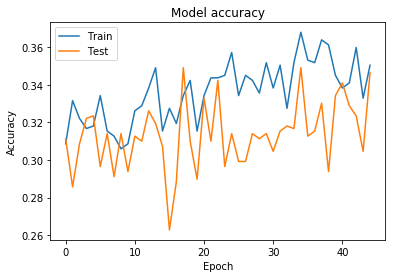

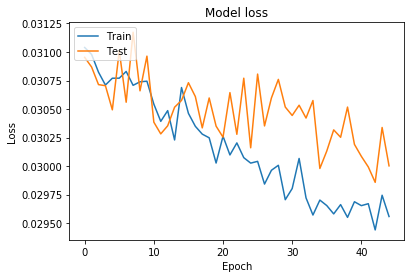

In [16]:
print(model.evaluate_generator(fl))
print(model.evaluate_generator(flv))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [17]:
import random
seed = random.randint(0, 100000)
p_l = test_l
p_i = test_i
flp = datagen.flow(p_i, p_l, batch_size=batch, seed=seed)
flp2 = datagen.flow(p_i, p_l, batch_size=batch, seed=seed)
predictions = model.predict_generator(flp)

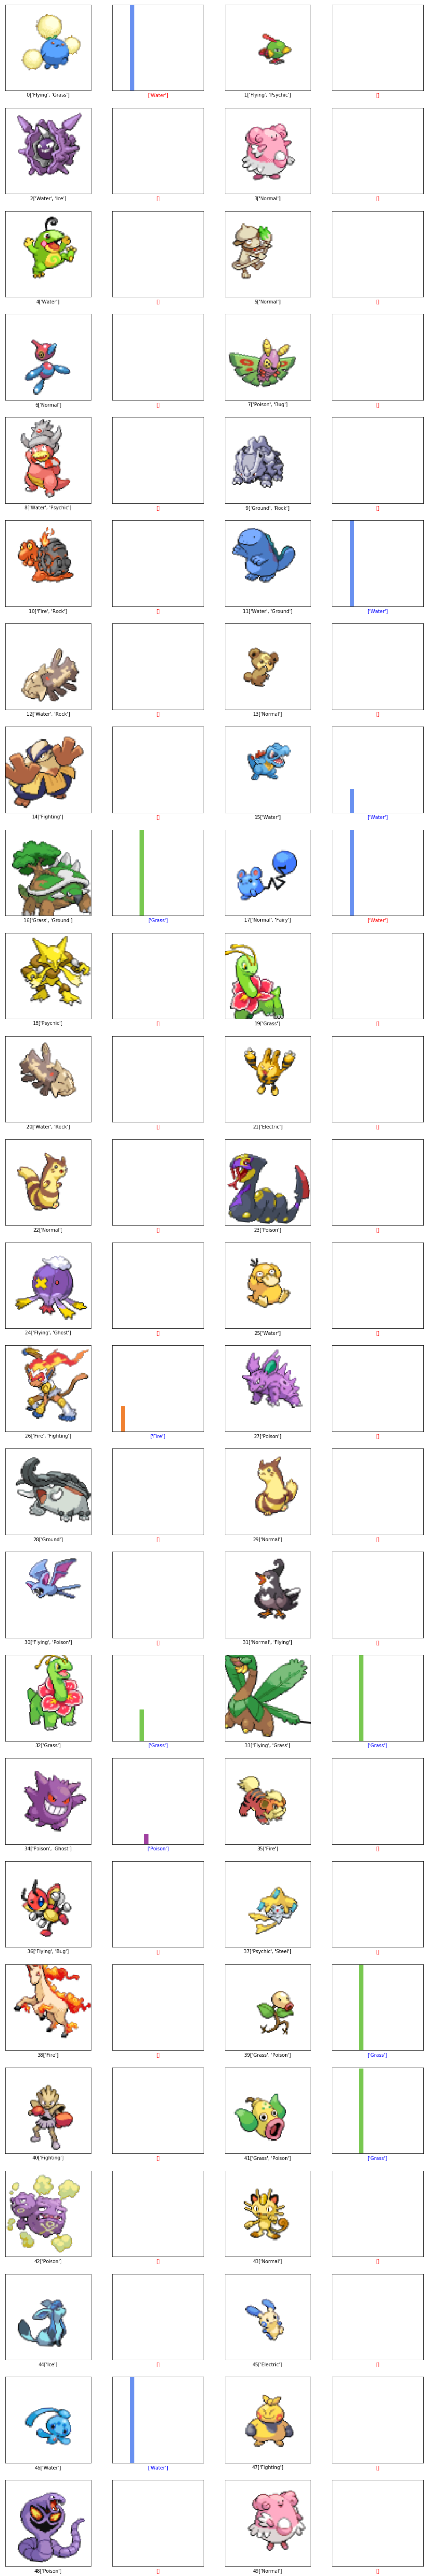

In [18]:
num_rows = 25
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(4*2*num_cols, 4*num_rows))
for i in range(min(num_images, len(predictions))):
  if i%batch == 0:
    im, l = flp2.next()
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image_batched(i, predictions, l, im, batch)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], l[i%batch])


(80, 80, 4)
(1, 18)
(18,)
[array([[-1.5463467 , -3.288548  , -3.3410175 , -1.8564936 ,  0.15973061,
        -2.2679605 , -2.5179806 , -2.9775164 , -2.666656  , -2.3754606 ,
        -2.841101  , -3.8944547 , -2.5538344 , -3.5454497 , -3.6177924 ,
        -3.6058295 , -3.407454  , -3.380143  ]], dtype=float32)]


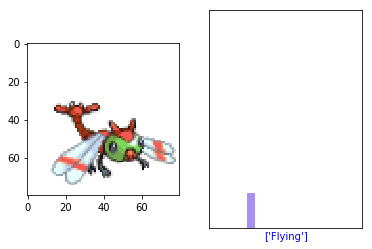

In [19]:
from random import randint
img_to_visualize = 7#randint(0, len(train_i) - 1)
#img_to_visualize = 17
from tensorflow.keras import backend as K
x, l = flp.next()
x = x[0:1]
print(np.squeeze(x).shape)
l = l[0:1]
print(l.shape)
print(np.squeeze(l).shape)

# Generate function to visualize first layer
convout1_f = K.function(model.inputs, [conv1.output])
convolutions1 = convout1_f([x])
convout2_f = K.function(model.inputs, [conv2.output])
convolutions2 = convout2_f([x])
#convout3_f = K.function(model.inputs, [conv3.output])
#convolutions3 = convout3_f([x])
final_in_f = K.function(model.inputs, [layer_out.input])
final_out_f = K.function(model.inputs, [layer_out.output])
final_in = final_in_f([x])
final_out = final_out_f([x])
plt.title("Image used: #%d " % (img_to_visualize))
plt.subplot(1, 2, 1)
plt.imshow(x[0] / 255.0)
plt.subplot(1, 2, 2)
print(final_out)
plot_value_array(0, final_out[0][0], np.squeeze(l))


In [20]:
#plt.title("First convolution:")
convolutions1=np.squeeze(convolutions1)
convolutions1 = np.transpose(convolutions1, (2, 0, 1))
convolutions2=np.squeeze(convolutions2)
convolutions2 = np.transpose(convolutions2, (2, 0, 1))
#convolutions3=np.squeeze(convolutions3)
#print(convolutions3.shape)
#convolutions3 = np.transpose(convolutions3)

final_in=np.squeeze(final_in)


(32, 77, 77)


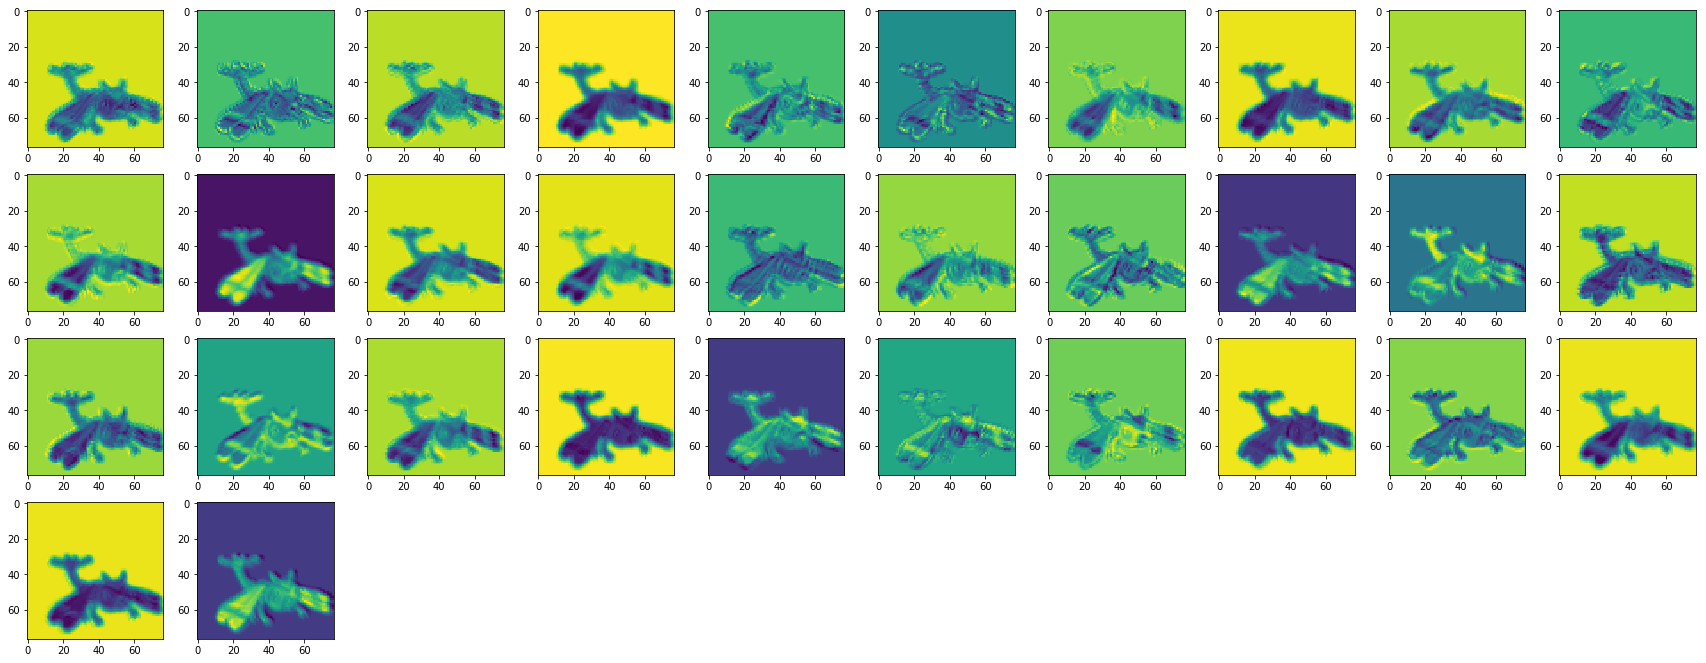

In [21]:
print(convolutions1.shape)
num_rows = 30
num_cols = 10
num_images = num_rows*num_cols
color='viridis_r'
plt.figure(figsize=(3*num_cols, 3*num_rows))
for i in range(min(num_images, len(convolutions1))):
  plt.subplot(num_rows, num_cols, i+1)
  plt.imshow(convolutions1[i], cmap=color)

(18, 17, 17)


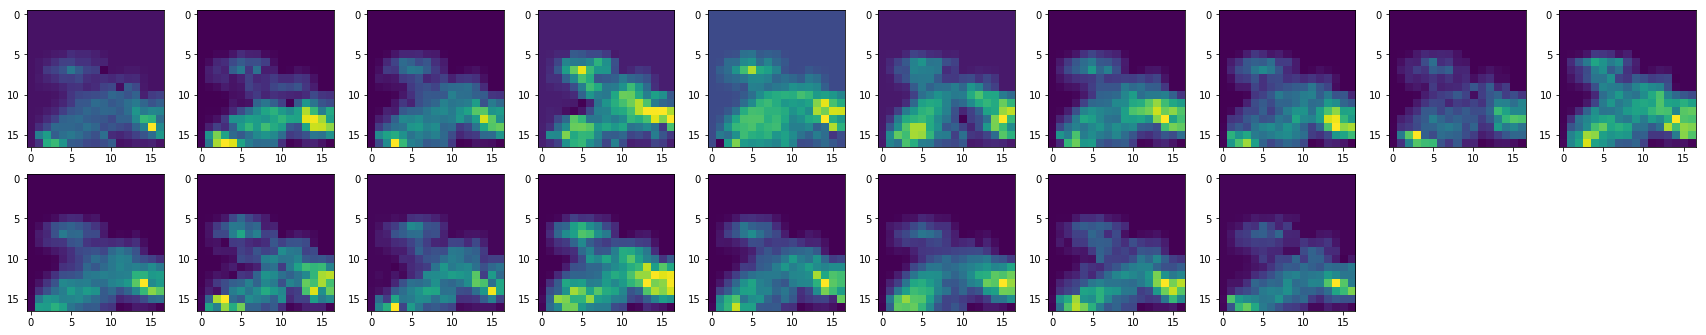

In [22]:
#num_rows = 30
#num_cols = 3
#num_images = num_rows*num_cols
print(convolutions2.shape)
plt.close()
plt.figure(figsize=(3*num_cols, 3*num_rows))
for i in range(min(num_images, len(convolutions2))):
  plt.subplot(num_rows, num_cols, i+1)
  plt.imshow(convolutions2[i], cmap=color)


In [23]:
#num_rows = 30
#num_cols = 3
#num_images = num_rows*num_cols
plt.figure(figsize=(3*num_cols, 3*num_rows))
for i in range(min(num_images, len(convolutions3))):
    plt.subplot(num_rows, num_cols, i*2+1)
    plt.imshow(convolutions3[i], cmap=color)
    plt.subplot(num_rows, num_cols, i*2+2)
    



NameError: name 'convolutions3' is not defined

<Figure size 2160x6480 with 0 Axes>

(9, 9, 32, 18)


IndexError: index 18 is out of bounds for axis 3 with size 18

<Figure size 2160x6480 with 0 Axes>

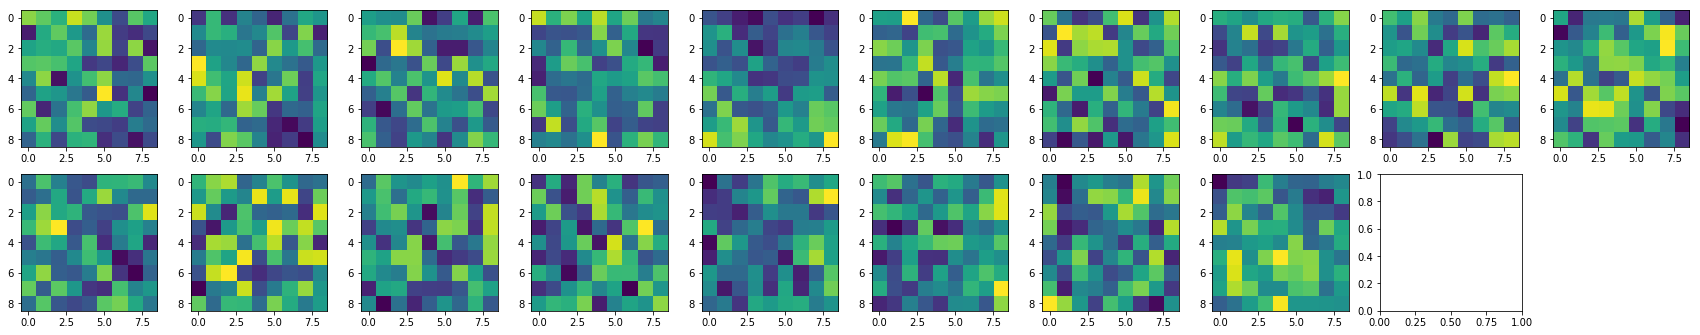

In [127]:
plt.figure(figsize=(3*num_cols, 3*num_rows))
weights = conv2.get_weights()
print(weights[0].shape)

for i in range(16, 32):
  plt.figure(figsize=(3*num_cols, 3*num_rows))
  for j in range(32):
    plt.subplot(num_rows, num_cols, j+1)
    weights = conv2.get_weights()[0][:, :, i, j]
    #print(weights)
    #print(weights.shape)
    weights = ((weights - np.min(weights)))
    weights = weights / np.max(weights)
    plt.imshow((weights))

In [ ]:
plt.close()
plt.scatter(types, final_in, c=colors)


In [ ]:
weights = layer_out.get_weights


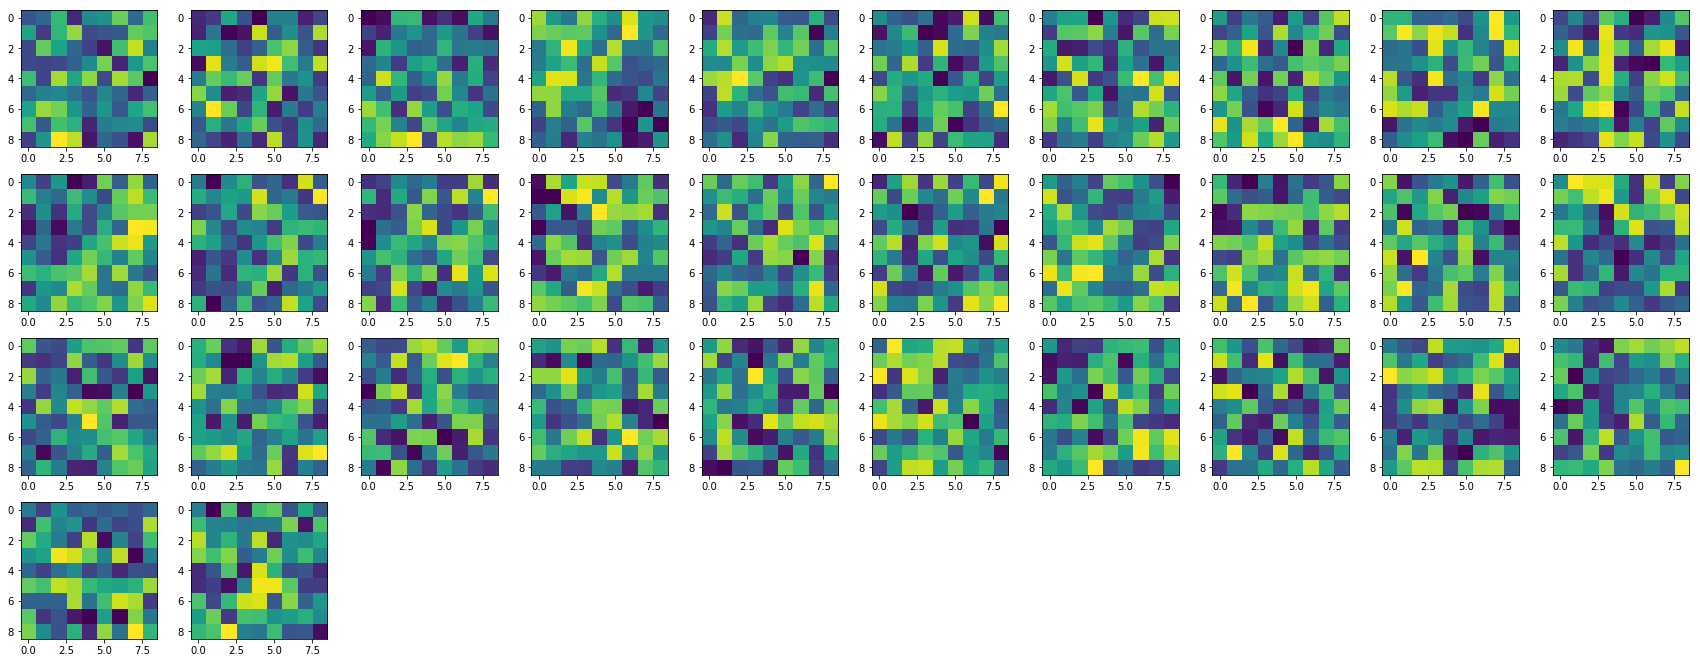

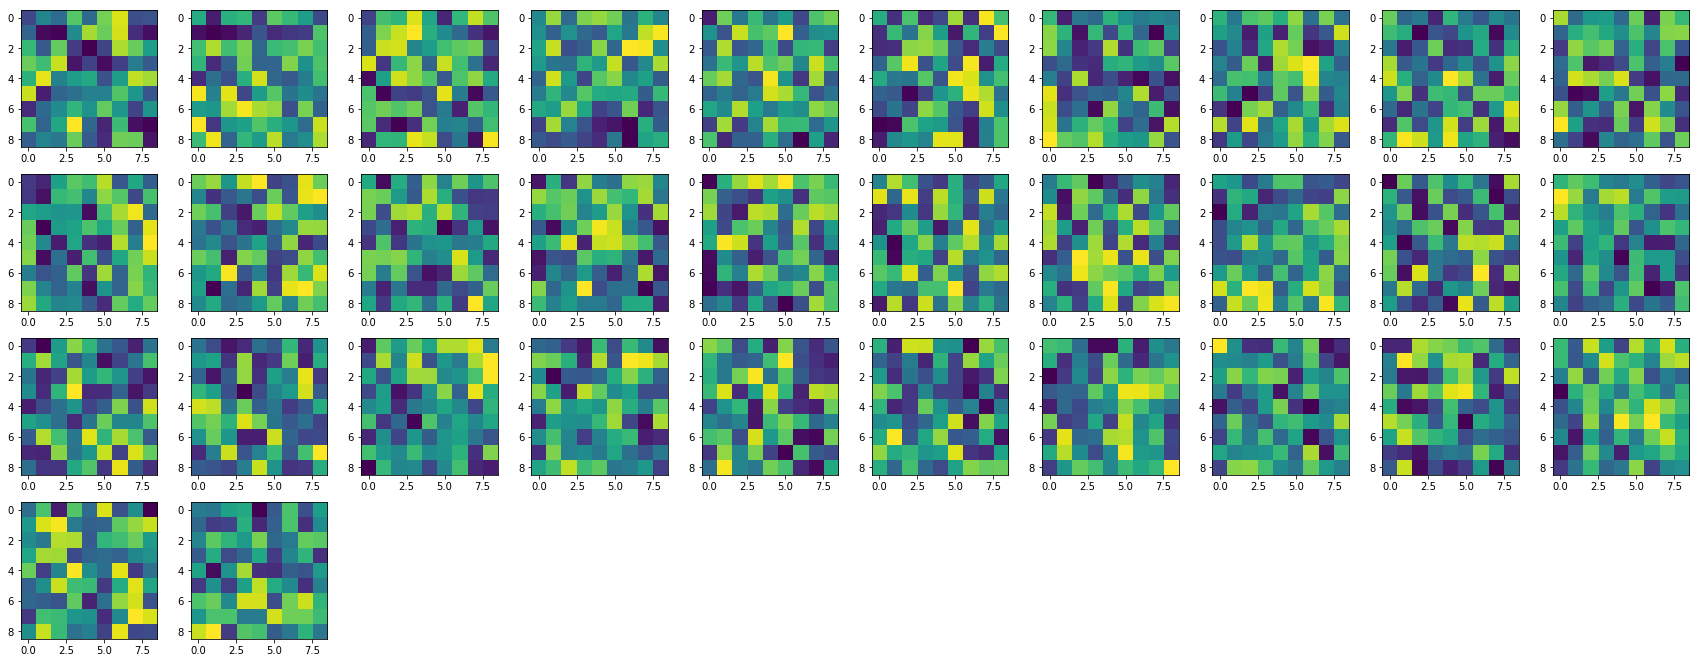

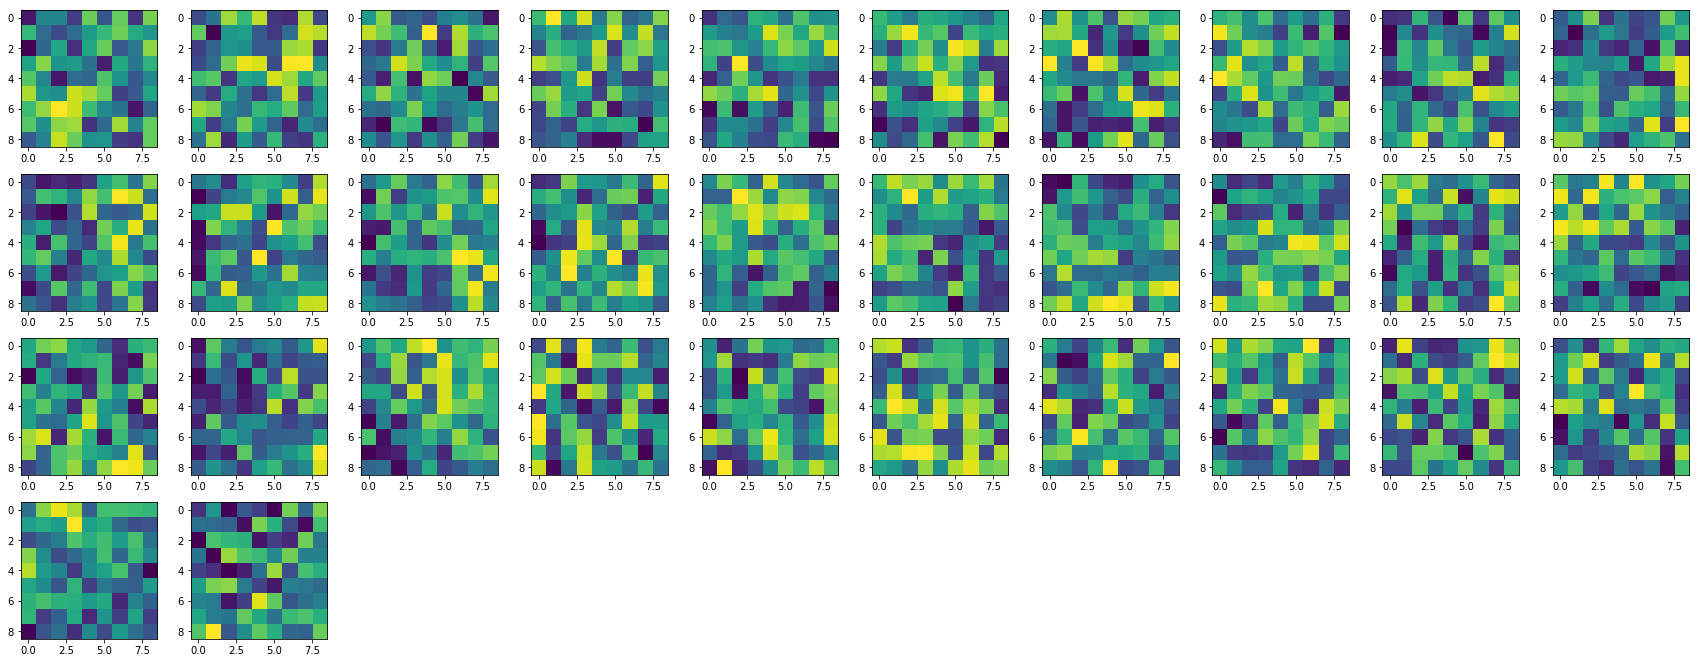

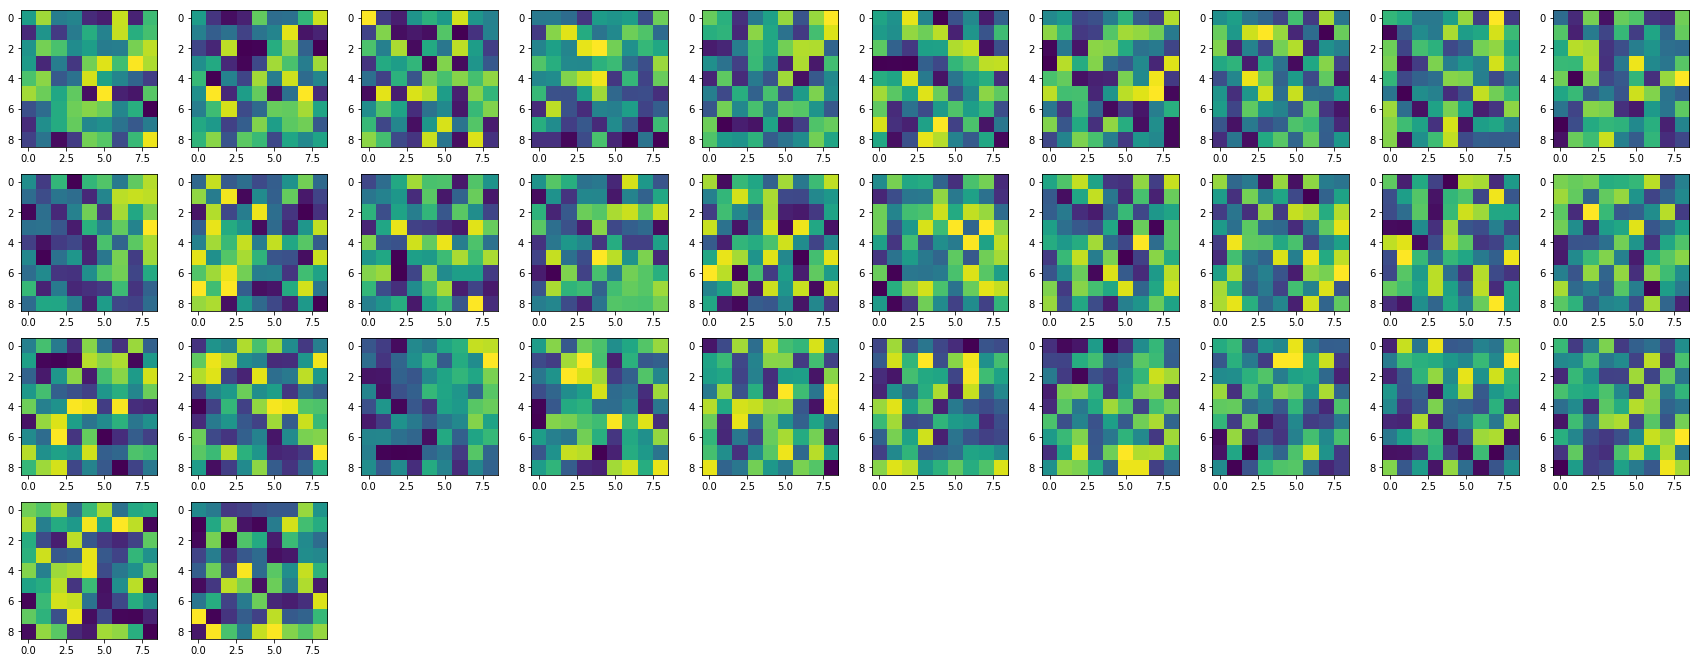

In [133]:

for i in range(4):
  plt.figure(figsize=(3*num_cols, 3*num_rows))
  for j in range(32):
    plt.subplot(num_rows, num_cols, j+1)
    weights = conv1.get_weights()[0][:, :, i, j]
    #print(weights)
    #print(weights.shape)
    weights = ((weights - np.min(weights)))
    weights = weights / np.max(weights)
    plt.imshow((weights))

In [ ]:
for i in range(16):
  plt.figure(figsize=(3*num_cols, 3*num_rows))
  for j in range(32):
    plt.subplot(num_rows, num_cols, j+1)
    weights = conv3.get_weights()[0][:, :, i, j]
    #print(weights)
    #print(weights.shape)
    weights = ((weights - np.min(weights)))
    weights = weights / np.max(weights)
    plt.imshow((weights))

In [ ]:
for i in range(16, 32):
  plt.figure(figsize=(3*num_cols, 3*num_rows))
  for j in range(32):
    plt.subplot(num_rows, num_cols, j+1)
    weights = conv3.get_weights()[0][:, :, i, j]
    #print(weights)
    #print(weights.shape)
    weights = ((weights - np.min(weights)))
    weights = weights / np.max(weights)
    plt.imshow((weights))

(1, 1, 4, 10)
0
(1, 1, 4, 10)
1
(1, 1, 4, 10)
2
(1, 1, 4, 10)
3
(1, 1, 4, 10)
4
(1, 1, 4, 10)
5
(1, 1, 4, 10)
6
(1, 1, 4, 10)
7
(1, 1, 4, 10)
8
(1, 1, 4, 10)
9


C:\Users\Malcolm\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
C:\Users\Malcolm\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Malcolm\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Malcolm\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


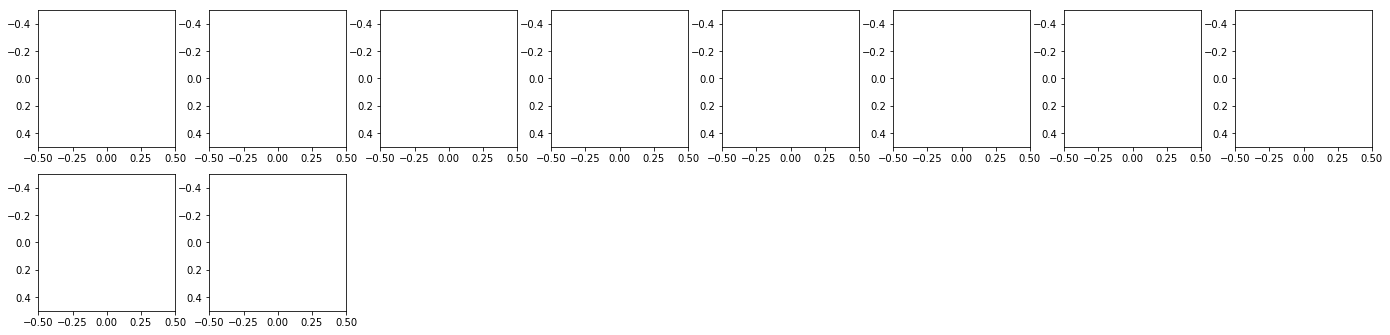

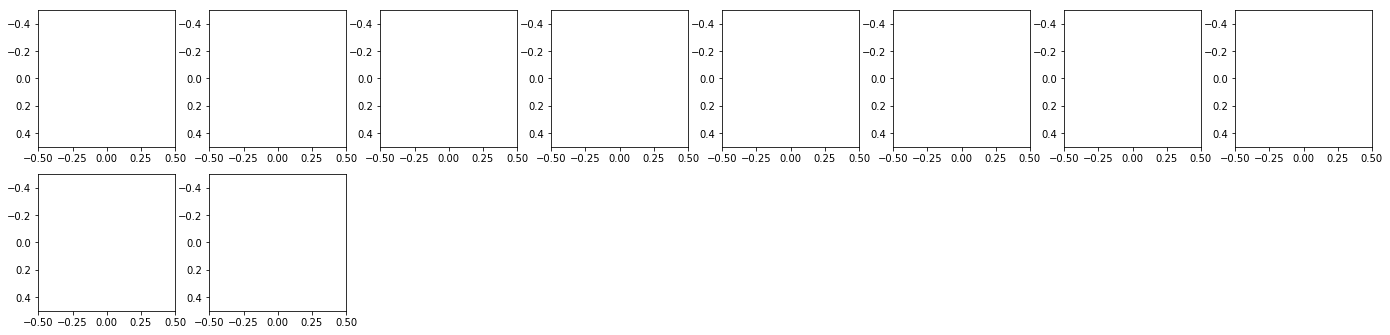

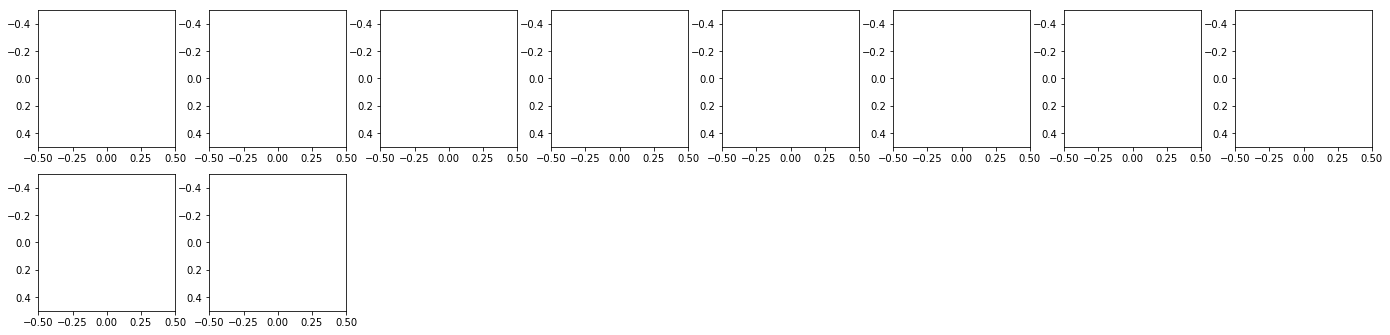

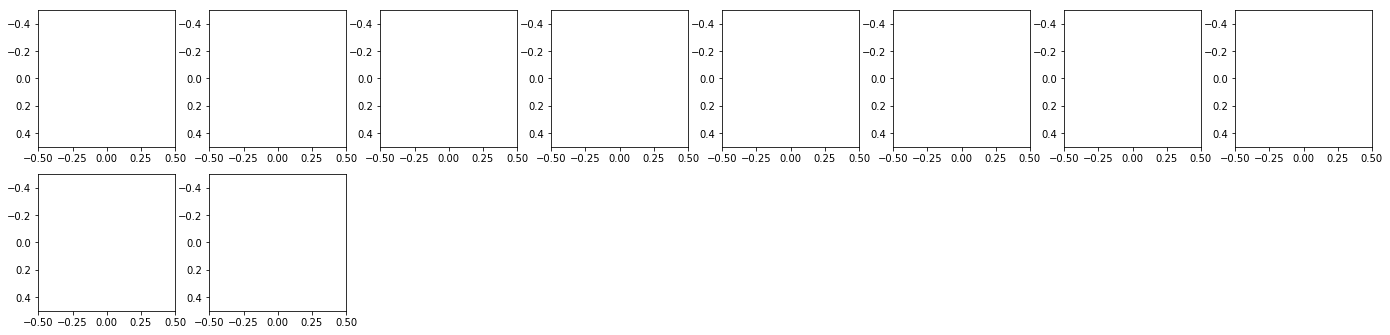

In [93]:
num_rows = 30
num_cols = 8
num_images = num_rows*num_cols
plt.figure(figsize=(3*num_cols, 3*num_rows))
for i in range(min(num_images, len(conv1.get_weights()[0][0][0][0]))):
    plt.subplot(num_rows, num_cols, i+1)
    print(conv1.get_weights()[0].shape)
    print(i)
    weights = conv1.get_weights()[0][:, :, 0, i]
    #print(weights.shape)
    weights = ((weights - np.min(weights)))
    weights = weights / np.max(weights)
    plt.imshow((weights), cmap = 'Reds')

plt.figure(figsize=(3*num_cols, 3*num_rows))
for i in range(min(num_images, len(conv1.get_weights()[0][0][0][0]))):
    plt.subplot(num_rows, num_cols, i+1)
    #print(conv1.get_weights()[0].shape)
    weights = conv1.get_weights()[0][:, :, 1, i]
    #print(weights.shape)
    weights = ((weights - np.min(weights)))
    weights = weights / np.max(weights)
    plt.imshow((weights), cmap = 'Greens')

plt.figure(figsize=(3*num_cols, 3*num_rows))
for i in range(min(num_images, len(conv1.get_weights()[0][0][0][0]))):
    plt.subplot(num_rows, num_cols, i+1)
    #print(conv1.get_weights()[0].shape)
    weights = conv1.get_weights()[0][:, :, 2, i]
    #print(weights.shape)
    weights = ((weights - np.min(weights)))
    weights = weights / np.max(weights)
    plt.imshow((weights), cmap = 'Blues')

plt.figure(figsize=(3*num_cols, 3*num_rows))
for i in range(min(num_images, len(conv1.get_weights()[0][0][0][0]))):
    plt.subplot(num_rows, num_cols, i+1)
    #print(conv1.get_weights()[0].shape)
    weights = conv1.get_weights()[0][:, :, 3, i]
    #print(weights.shape)
    weights = ((weights - np.min(weights)))
    weights = weights / np.max(weights)
    plt.imshow((weights), cmap='gist_yarg')

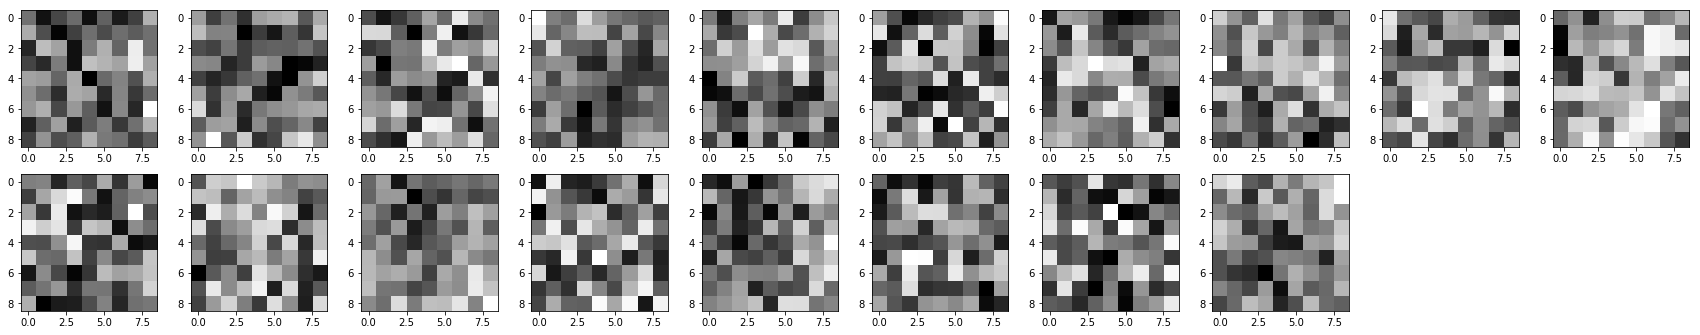

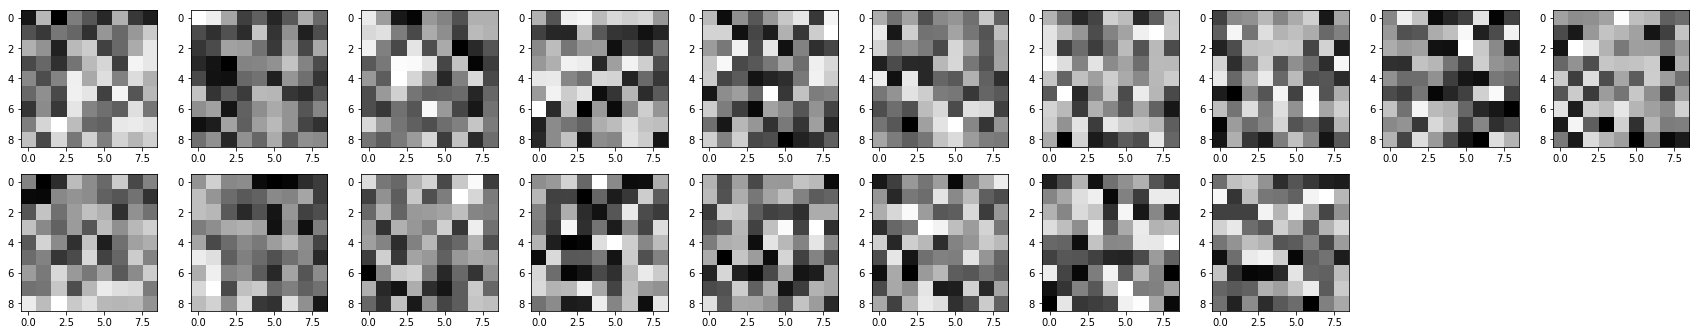

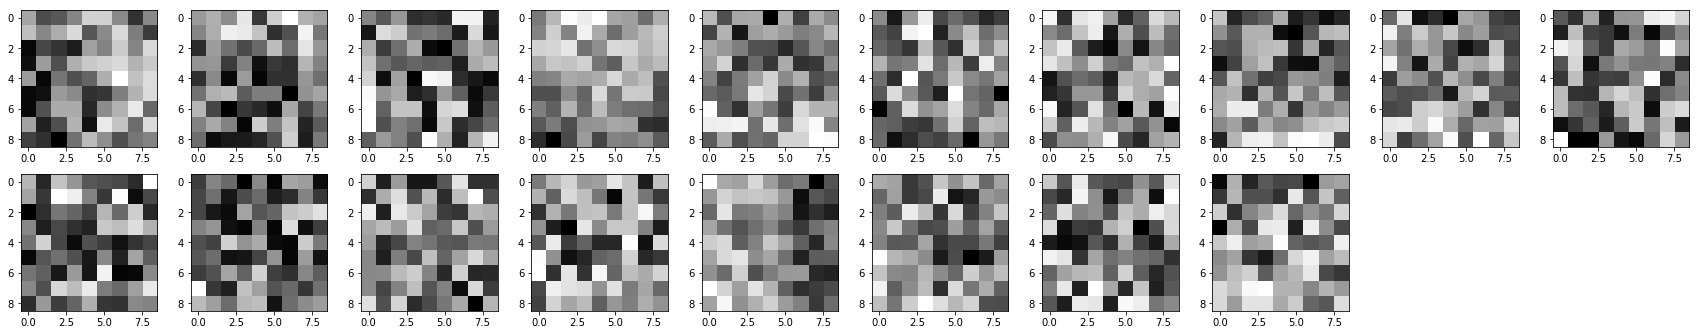

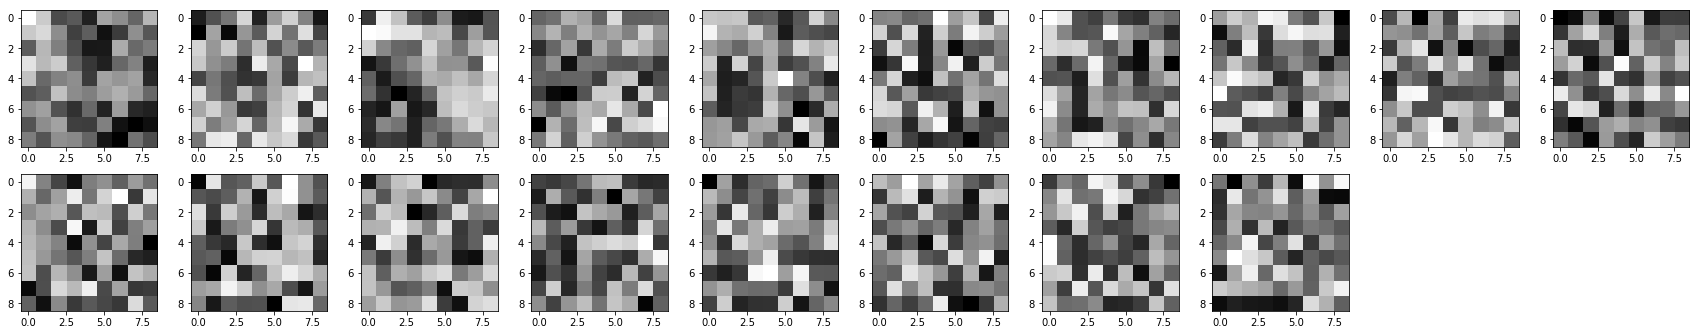

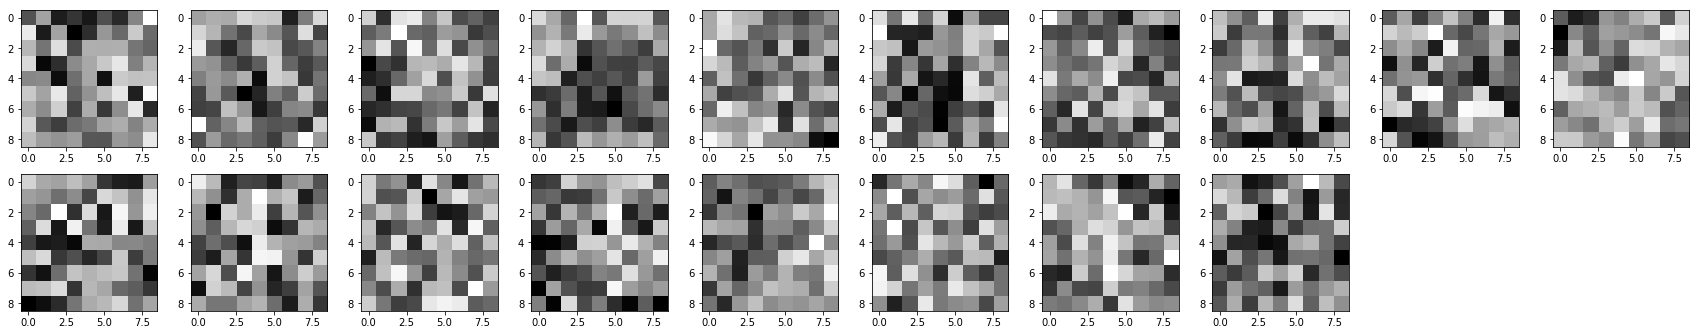

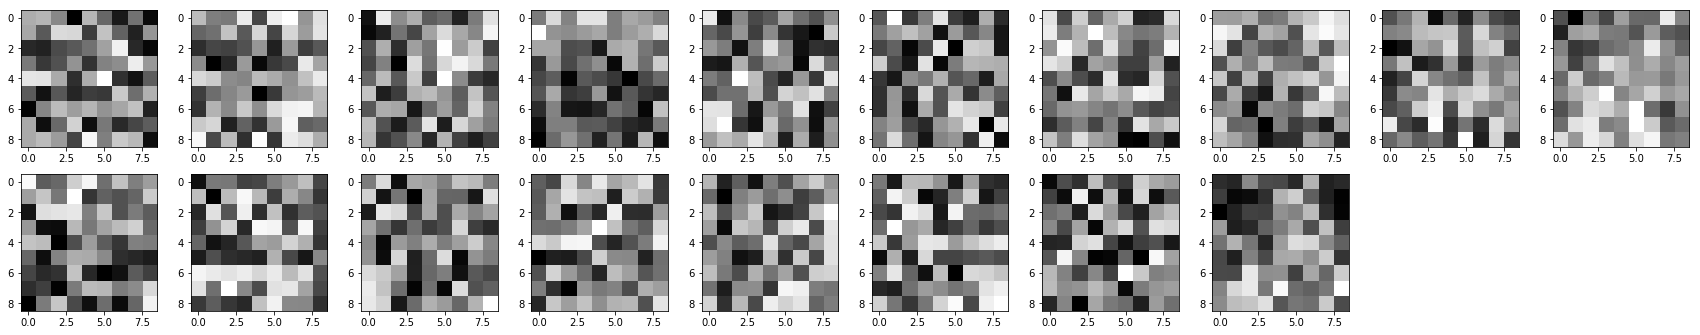

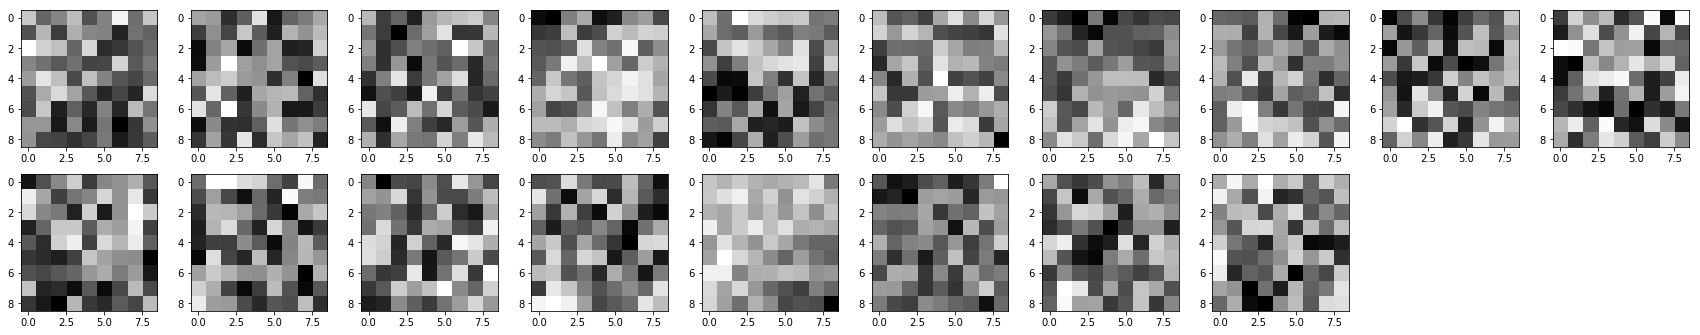

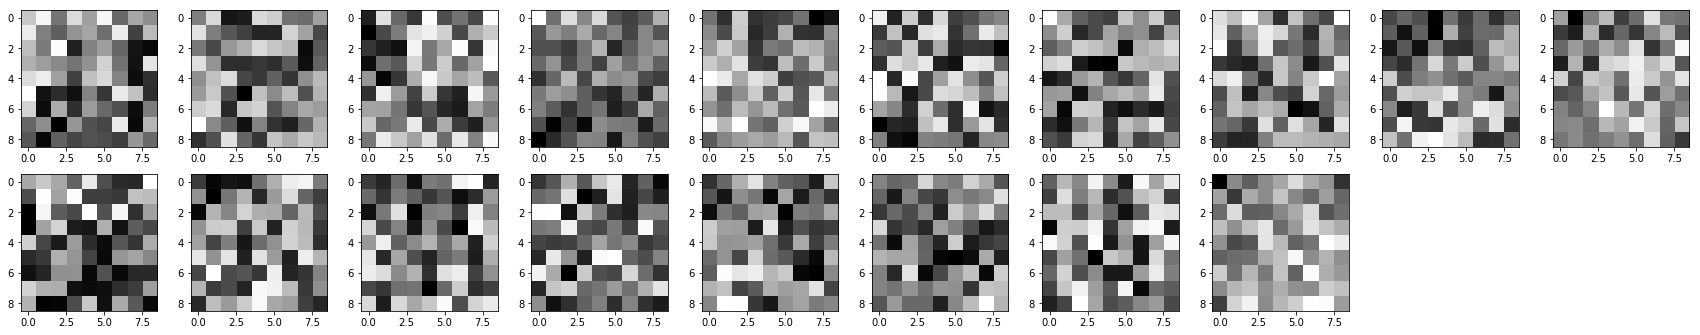

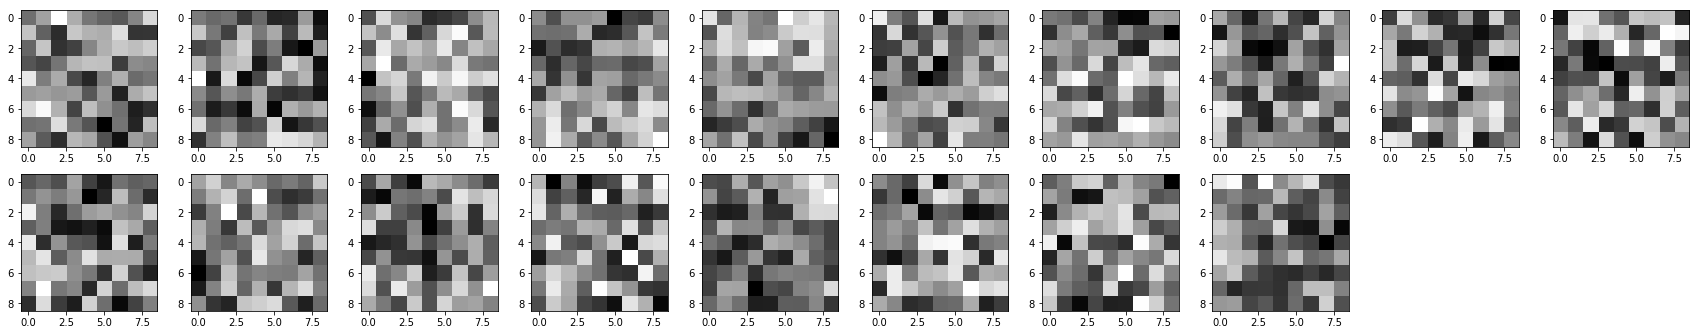

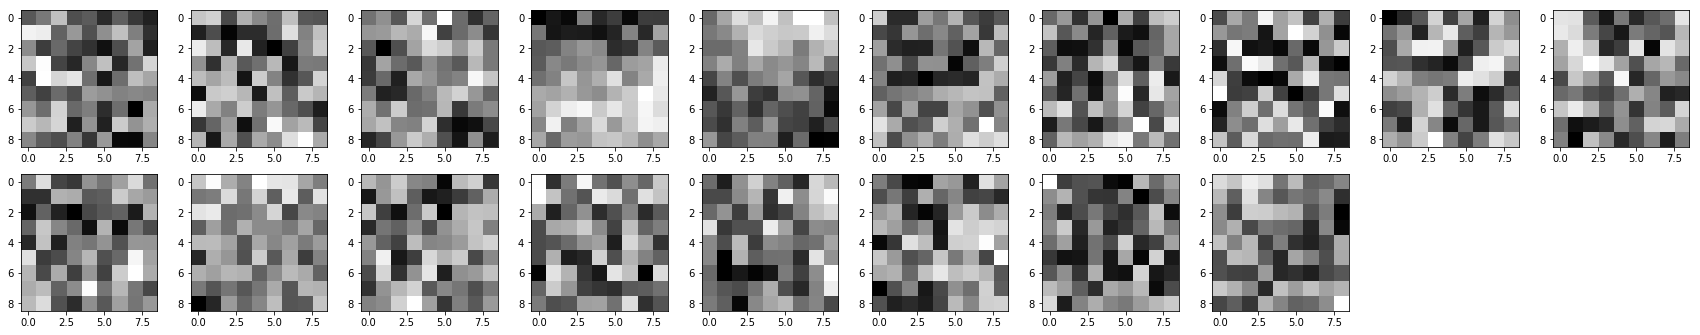

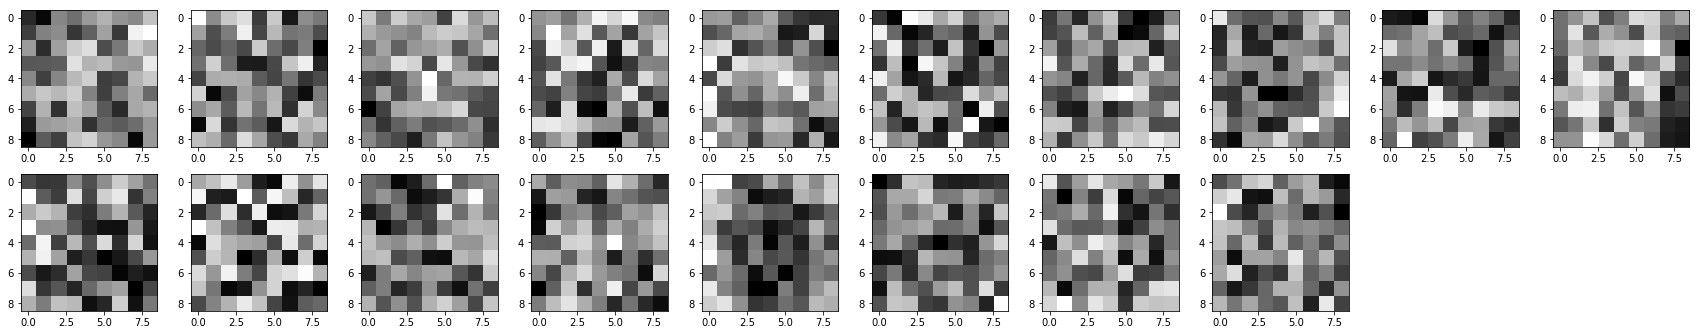

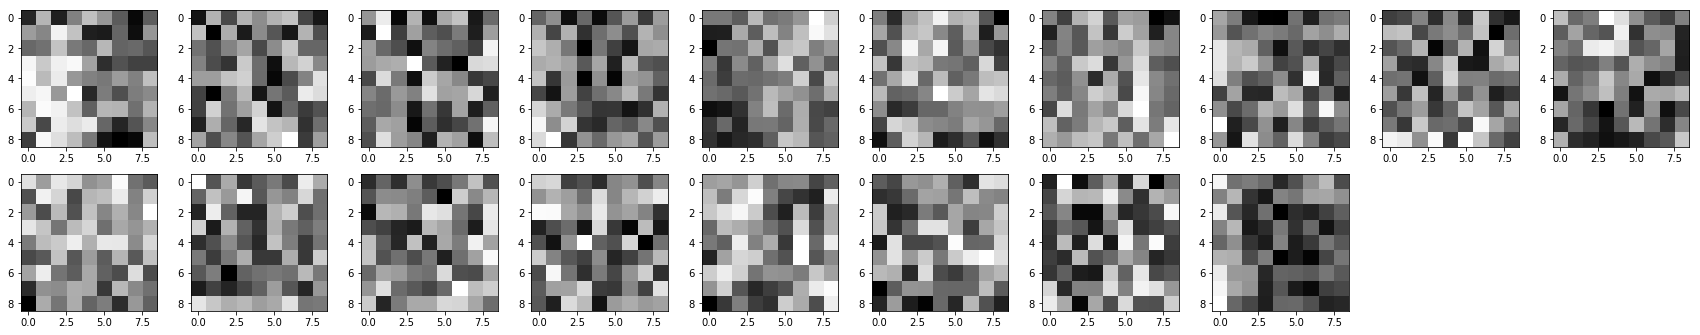

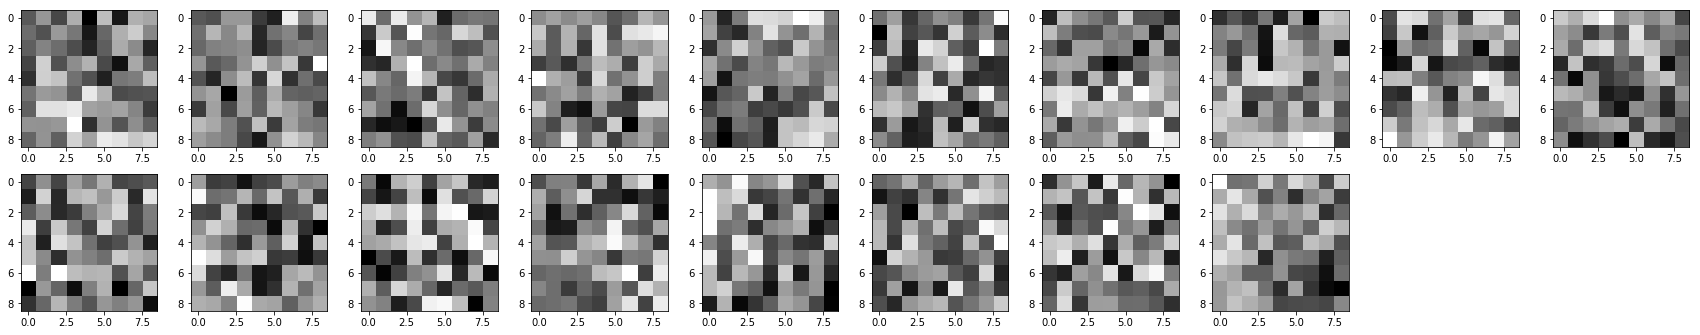

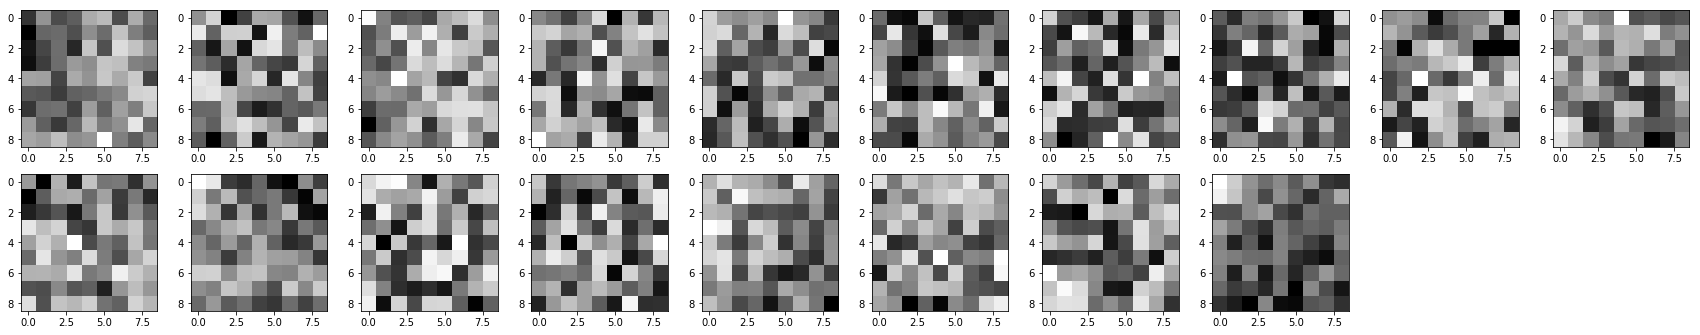

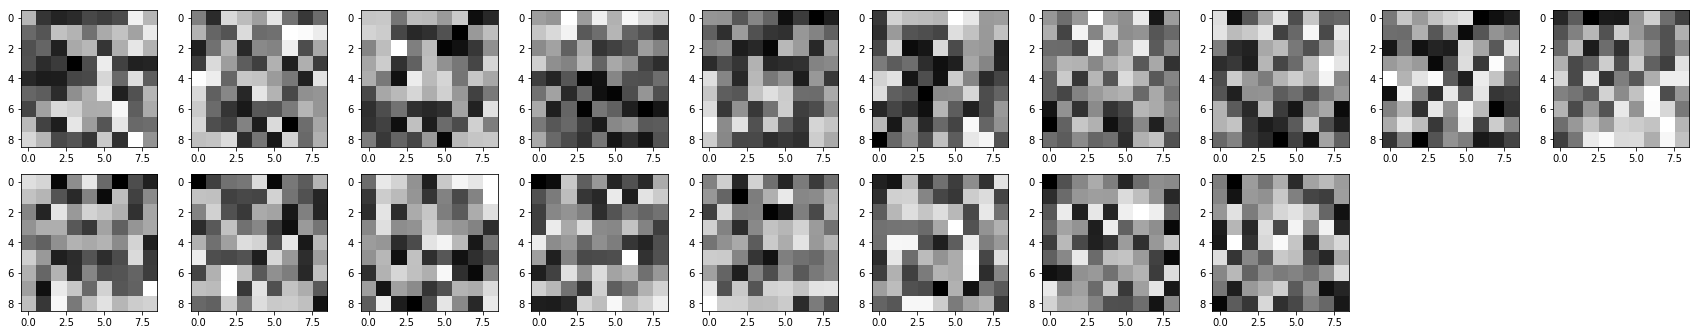

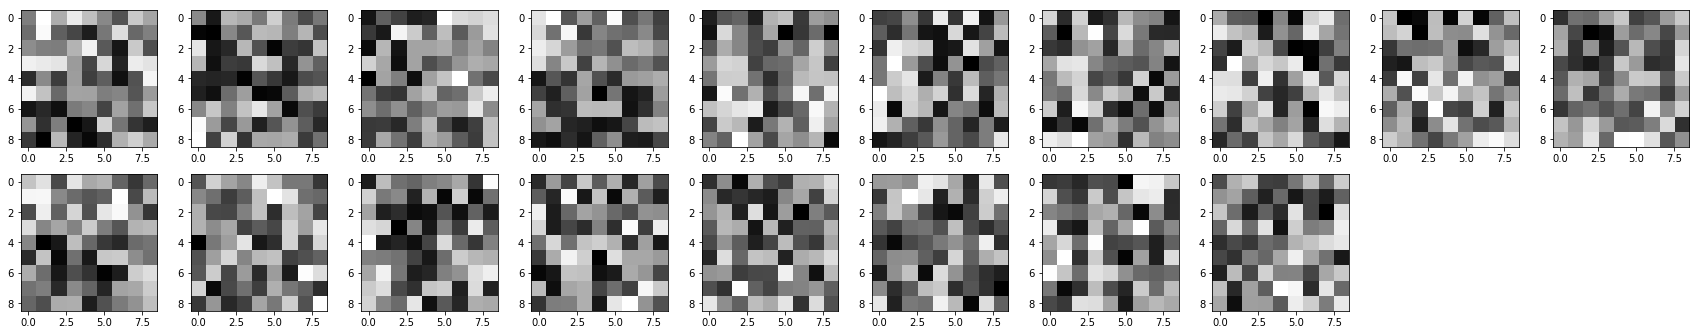

In [134]:

for i in range(16):
  plt.figure(figsize=(3*num_cols, 3*num_rows))
  for j in range(18):
    plt.subplot(num_rows, num_cols, j+1)
    weights = conv2.get_weights()[0][:, :, i, j]
    #print(weights)
    #print(weights.shape)
    weights = ((weights - np.min(weights)))
    weights = weights / np.max(weights)
    plt.imshow(weights, cmap='binary')